# LINEAR REGRESSION BIKE SHARING ASSIGNMENT

PROBLEM STATEMENT:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 
In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.
They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
1)Which variables are significant in predicting the demand for shared bikes.
2)How well those variables describe the bike demands

BUSINESS GOAL:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## 1)Importing the libraries

In [143]:
import warnings
warnings.filterwarnings('ignore')

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## 2)Data quality checks

In [146]:
#loading the data file
tes=pd.read_csv("day.csv")
tes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [147]:
#checking the data types of columns
tes.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [148]:
#summarizing numerical columns of data
tes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [149]:
tes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [150]:
#checking shape of data
tes.shape

(730, 16)

In [151]:
#checking number of unique values
tes.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

## 3) Data visualization and EDA

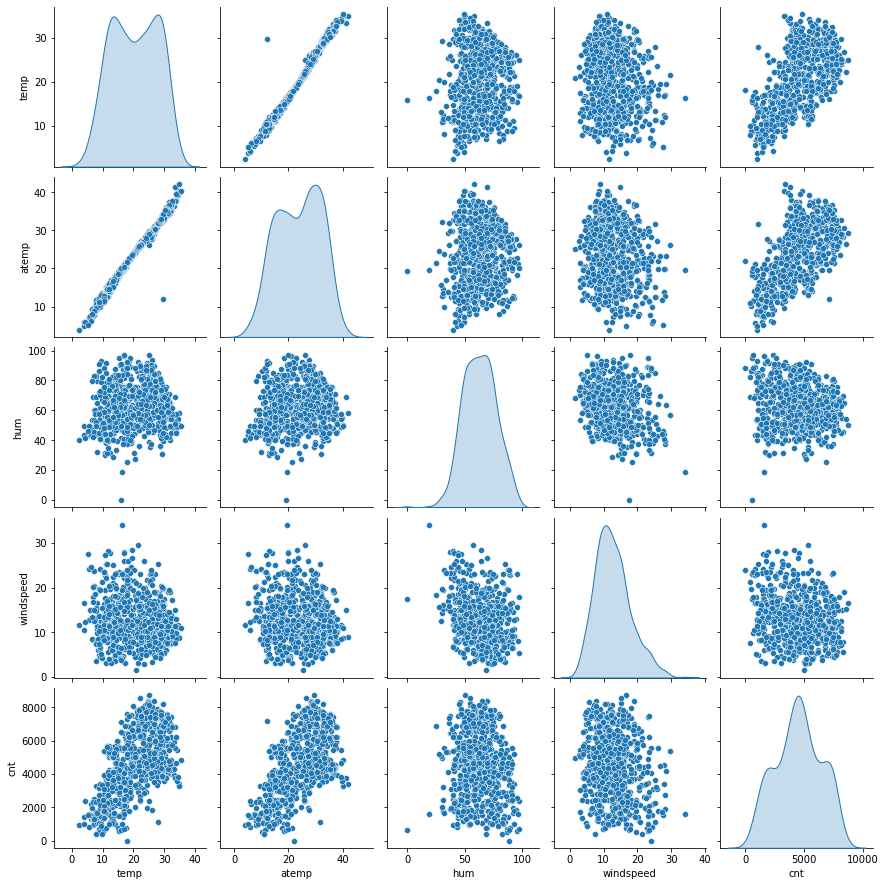

In [154]:
#plotting numerical variables
tes_num=tes[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]
sns.pairplot(tes_num, diag_kind='kde')
plt.show()

<i>From the above graph, we can conclude that there is a linear relationship between 'temp','atemp','cnt'.</i>

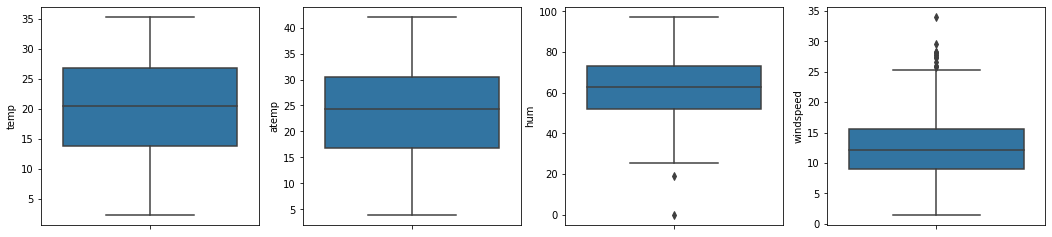

In [155]:
#checking for outliers
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=tes)
    i+=1

<i> Here, we can see that there are no outliers.</i>

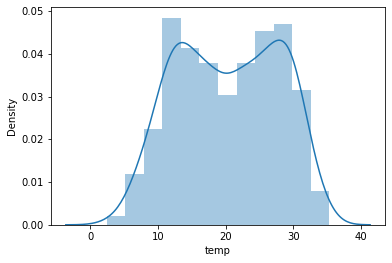

In [156]:
sns.distplot(tes['temp'])
plt.show()

In [157]:
#changing numerical data into categorical for better analysis
tes.loc[(tes['season']== 1), 'season'] = 'spring'

tes.loc[(tes['season']== 2), 'season'] = 'summer'

tes.loc[(tes['season']== 3), 'season'] = 'fall'

tes.loc[(tes['season']== 4), 'season'] = 'winter'

In [158]:
#checking if the above code has been executed correctly
tes['season'].astype('category').value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [159]:
#changing month numbers into month names
def object_map(x):
    return x.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

tes[['mnth']] = tes[['mnth']].apply(object_map)

In [160]:
#checking if the above code has been executed correctly
tes['mnth'].astype('category').value_counts()

Oct    62
May    62
Mar    62
Jul    62
Jan    62
Dec    62
Aug    62
Sep    60
Nov    60
Jun    60
Apr    60
Feb    56
Name: mnth, dtype: int64

In [161]:
#Replacing long weathersit names into string values 

#1: Clear, Few clouds, Partly cloudy, Partly cloudy
tes.loc[(tes['weathersit']== 1), 'weathersit'] = 'A'

#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
tes.loc[(tes['weathersit']== 2), 'weathersit'] = 'B'    

#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
tes.loc[(tes['weathersit']== 3), 'weathersit'] = 'C'

#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
tes.loc[(tes['weathersit']== 4), 'weathersit'] = 'D'

In [162]:
#checking if the above code has been executed properly
tes['weathersit'].astype('category').value_counts()

A    463
B    246
C     21
Name: weathersit, dtype: int64

In [163]:
#Assigning string values to weekdays names

def s_map(x):
    return x.map({1:'Wed', 2:'Thurs', 3:'Fri', 4:'Sat', 5:'Sun', 6:'Mon', 7:'Tues'})

tes[['weekday']] = tes[['weekday']].apply(s_map)

In [164]:
#checking if the above code has been executed correctly
tes['weekday'].astype('category').value_counts()

Wed      105
Thurs    105
Sun      104
Sat      104
Mon      104
Fri      104
Name: weekday, dtype: int64

In [165]:
#displaying the correlation table
tes.corr()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.866026,0.016275,-0.015171,0.150738,0.152773,0.016080,-0.112667,0.275604,0.660544,0.629896
yr,0.866026,1.000000,0.008195,-0.011852,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
holiday,0.016275,0.008195,1.000000,-0.257009,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
workingday,-0.015171,-0.011852,-0.257009,1.000000,0.002044,0.010657,0.053770,-0.002453,-0.090369,0.005466,-0.027640
temp,0.150738,0.048789,-0.028764,0.002044,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.152773,0.047215,-0.032703,0.010657,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.016080,-0.112547,-0.015662,0.053770,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.112667,-0.011624,0.006257,-0.002453,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.275604,0.250502,0.054055,-0.090369,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.660544,0.596911,-0.109142,0.005466,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411


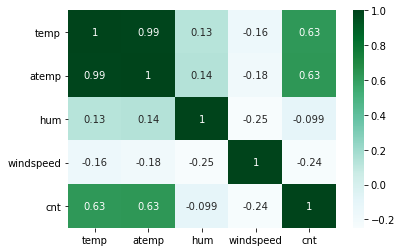

In [166]:
#plotting the heatmap
sns.heatmap(tes[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

<i>Here we see that temp and atemp has correlation more than .99 means almost 1 (highly correlated) and atemp seems to be derived from temp.</i>

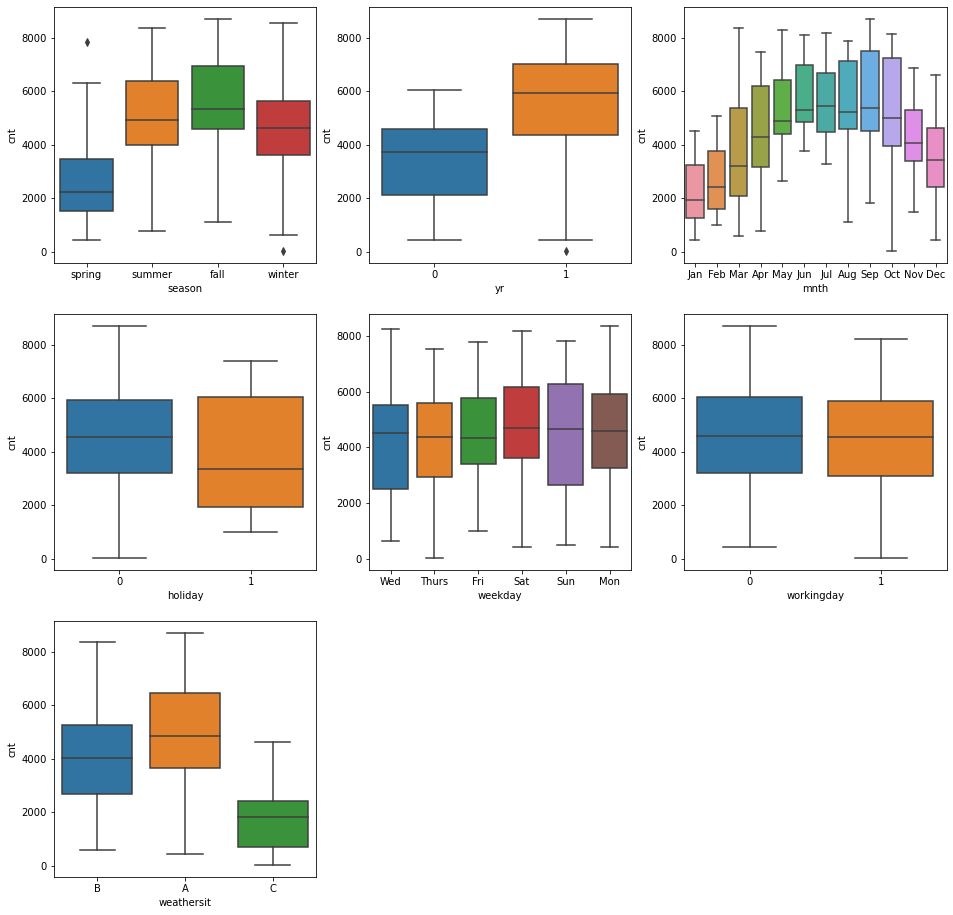

In [167]:
#plotting the categorical variables for analysis
cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(16,16))
for i in enumerate(cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=tes, x=i[1], y='cnt')
plt.show()

<i> From the above graph , we can conclude that: 
    1) Fall has the highest demand for rental bikes.
    2) In 2019, the demand for bike sharing has been increased.
    3) In september , the demand is more.
    4) These is no effect in count of rental bikes when it comes to the fact whether it's working day or not.
    5) There is more demand during the weekends.
    6) There is more demand during the weathersit A.</i>

## 4)Creating dummy variables.

In [168]:
tes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     626 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


In [169]:
#converting certain variables into categorical types before creating dummy variables
tes['season']=tes['season'].astype('category')
tes['weathersit']=tes['weathersit'].astype('category')
tes['mnth']=tes['mnth'].astype('category')
tes['weekday']=tes['weekday'].astype('category')

In [170]:
#checking if the above code has been executed correctly
tes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     730 non-null    int64   
 1   dteday      730 non-null    object  
 2   season      730 non-null    category
 3   yr          730 non-null    int64   
 4   mnth        730 non-null    category
 5   holiday     730 non-null    int64   
 6   weekday     626 non-null    category
 7   workingday  730 non-null    int64   
 8   weathersit  730 non-null    category
 9   temp        730 non-null    float64 
 10  atemp       730 non-null    float64 
 11  hum         730 non-null    float64 
 12  windspeed   730 non-null    float64 
 13  casual      730 non-null    int64   
 14  registered  730 non-null    int64   
 15  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(7), object(1)
memory usage: 72.3+ KB


In [171]:
#creating dummy variables
season = pd.get_dummies(tes['season'], drop_first = True)
weather = pd.get_dummies(tes['weathersit'], drop_first = True)
month = pd.get_dummies(tes['mnth'], drop_first = True)
weekday = pd.get_dummies(tes['weekday'], drop_first = True)                         

In [172]:
season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [173]:
weather.head()

,B,C
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [174]:
month.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [175]:
weekday.head()

,Mon,Sat,Sun,Thurs,Wed
0,0,0,0,0,1
1,0,0,0,1,0
2,0,0,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0


In [176]:
#concatinating dummy variables into our dataset
tes_new = pd.concat([tes,season,month,weather,weekday], axis = 1)
tes_new.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,Nov,Oct,Sep,B,C,Mon,Sat,Sun,Thurs,Wed
0,1,01-01-2018,spring,0,Jan,0,Wed,1,B,14.110847,...,0,0,0,1,0,0,0,0,0,1
1,2,02-01-2018,spring,0,Jan,0,Thurs,1,B,14.902598,...,0,0,0,1,0,0,0,0,1,0
2,3,03-01-2018,spring,0,Jan,0,Fri,1,A,8.050924,...,0,0,0,0,0,0,0,0,0,0
3,4,04-01-2018,spring,0,Jan,0,Sat,1,A,8.200000,...,0,0,0,0,0,0,1,0,0,0
4,5,05-01-2018,spring,0,Jan,0,Sun,1,A,9.305237,...,0,0,0,0,0,0,0,1,0,0


In [177]:
tes_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     730 non-null    int64   
 1   dteday      730 non-null    object  
 2   season      730 non-null    category
 3   yr          730 non-null    int64   
 4   mnth        730 non-null    category
 5   holiday     730 non-null    int64   
 6   weekday     626 non-null    category
 7   workingday  730 non-null    int64   
 8   weathersit  730 non-null    category
 9   temp        730 non-null    float64 
 10  atemp       730 non-null    float64 
 11  hum         730 non-null    float64 
 12  windspeed   730 non-null    float64 
 13  casual      730 non-null    int64   
 14  registered  730 non-null    int64   
 15  cnt         730 non-null    int64   
 16  spring      730 non-null    uint8   
 17  summer      730 non-null    uint8   
 18  winter      730 non-null    uint8   
 19  Aug     

In [178]:
#dropping unnecessary variables
tes_new.drop(['season','mnth','weathersit','weekday','dteday'],axis=1,inplace=True)
tes_new.shape

(730, 32)

## 5)Splitting the data into test and train

In [179]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [180]:
tes_new.drop(['instant','casual','registered'],axis=1,inplace=True)
tes_new.shape

(730, 29)

In [181]:
#splitting the data
np.random.seed(0)
bike_train, bike_test = train_test_split(tes_new, train_size = 0.7, random_state = 333)

In [182]:
#checking the shape of the train dataset
bike_train.shape

(510, 29)

In [183]:
#checking the shape of the test dataset
bike_test.shape

(220, 29)

## 6)Rescaling the features

In [184]:
scaler = MinMaxScaler()

In [185]:
num_vars = ['temp','atemp','hum','windspeed','cnt']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Nov,Oct,Sep,B,C,Mon,Sat,Sun,Thurs,Wed
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,0,1,0,0,0,0,0,0,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,0,...,0,0,0,0,0,0,0,0,0,0
714,1,0,1,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,0,0,1,0,0,0,0,0,1
8,0,0,1,0.098690,0.048706,0.451083,0.700017,0.092039,1,0,...,0,0,0,0,0,0,0,0,1,0
502,1,0,0,0.629300,0.619631,0.543723,0.235894,0.876323,0,1,...,0,0,0,0,0,1,0,0,0,0


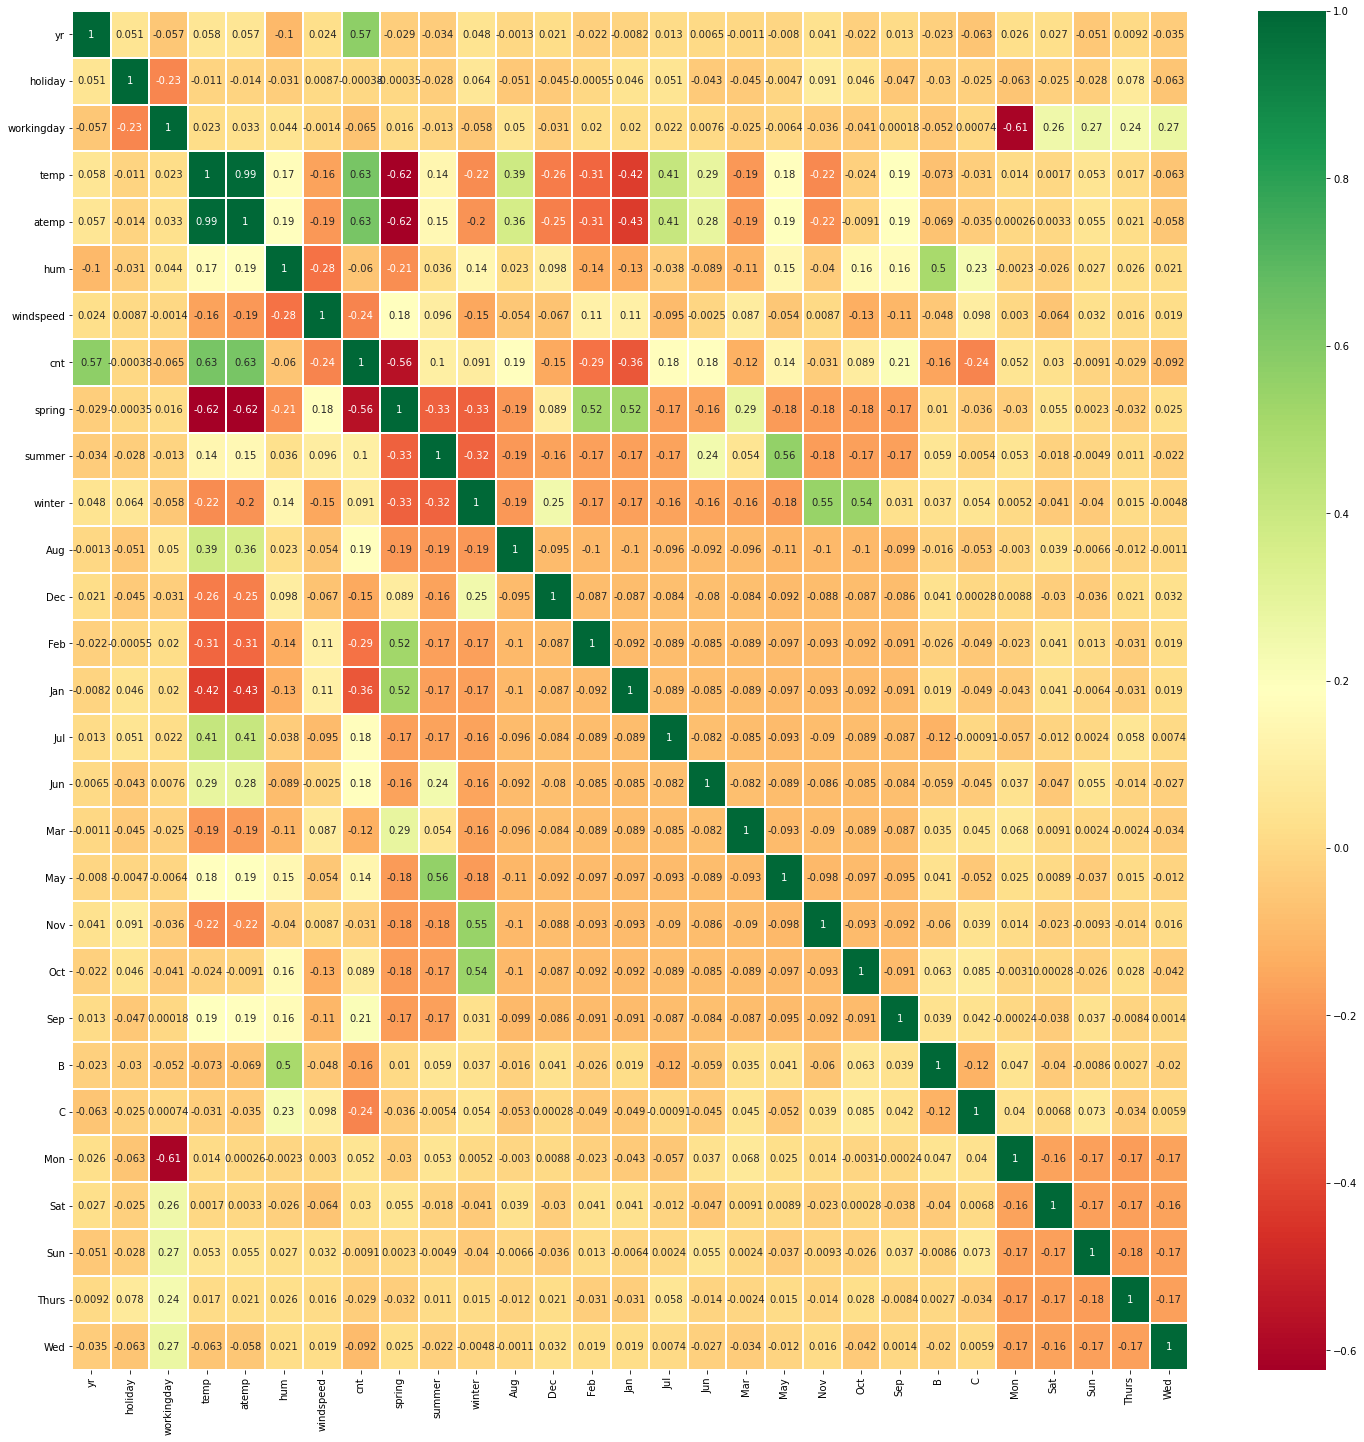

In [186]:
plt.figure(figsize = (25,25))
ax= sns.heatmap(bike_train.corr(), annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

<i>From the above graph, we can conclude that:
1)workingday variable has high negative correlation with Sat and Sun. 
2)Spring is negatively correlated with cnt.
3)temp, atemp and yr has strong correlation with cnt.
4)misty weather and humidity has correlation.</i>


## 7)building the linear model

In [187]:
y_train = bike_train.pop('cnt')
X_train = bike_train

In [188]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

In [189]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 12),
 ('winter', True, 1),
 ('Aug', False, 8),
 ('Dec', True, 1),
 ('Feb', False, 4),
 ('Jan', False, 3),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', True, 1),
 ('May', False, 2),
 ('Nov', True, 1),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('B', True, 1),
 ('C', True, 1),
 ('Mon', False, 14),
 ('Sat', False, 6),
 ('Sun', False, 7),
 ('Thurs', False, 9),
 ('Wed', False, 10)]

In [190]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'spring',
       'winter', 'Dec', 'Jul', 'Mar', 'Nov', 'Sep', 'B', 'C'],
      dtype='object')

In [191]:
X_train.columns[~rfe.support_]

Index(['workingday', 'summer', 'Aug', 'Feb', 'Jan', 'Jun', 'May', 'Oct', 'Mon',
       'Sat', 'Sun', 'Thurs', 'Wed'],
      dtype='object')

In [192]:
X_train_rfe = X_train[col]

In [193]:
def get_VIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

### Model 1

In [194]:
get_VIF(X_train_rfe)

,Features,VIF
2,temp,353.81
3,atemp,351.36
4,hum,22.92
5,windspeed,5.12
7,winter,2.76
6,spring,2.70
13,B,2.27
0,yr,2.05
11,Nov,1.83
8,Dec,1.41


In [195]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     168.6
Date:                Sat, 18 Sep 2021   Prob (F-statistic):          3.37e-183
Time:                        23:19:29   Log-Likelihood:                 501.38
No. Observations:                 510   AIC:                            -970.8
Df Residuals:                     494   BIC:                            -903.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3645      0.033     10.992      0.0

### Model 2

In [196]:
#we will drop atemp due to high VIF value
X_train_new = X_train_rfe.drop(['atemp'], axis = 1)
get_VIF(X_train_new)

,Features,VIF
3,hum,22.49
2,temp,15.84
4,windspeed,5.01
6,winter,2.73
5,spring,2.70
12,B,2.27
0,yr,2.05
10,Nov,1.83
7,Dec,1.41
8,Jul,1.41


In [197]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     180.5
Date:                Sat, 18 Sep 2021   Prob (F-statistic):          4.01e-184
Time:                        23:19:49   Log-Likelihood:                 500.88
No. Observations:                 510   AIC:                            -971.8
Df Residuals:                     495   BIC:                            -908.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3670      0.033     11.099      0.0

### Model 3

In [198]:
#we will drop 'hum' due to high VIF value
X_train_new = X_train_new.drop(['hum'], axis = 1)
get_VIF(X_train_new)

,Features,VIF
2,temp,5.12
3,windspeed,4.97
5,winter,2.36
0,yr,2.05
4,spring,1.90
9,Nov,1.80
11,B,1.53
7,Jul,1.37
6,Dec,1.34
8,Mar,1.22


In [199]:
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     186.0
Date:                Sat, 18 Sep 2021   Prob (F-statistic):          3.74e-181
Time:                        23:19:56   Log-Likelihood:                 491.07
No. Observations:                 510   AIC:                            -954.1
Df Residuals:                     496   BIC:                            -894.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2729      0.026     10.616      0.0

### Model 4

In [200]:
#we will drop 'windspeed' due to high p-value
X_train_new = X_train_new.drop(['windspeed'], axis = 1)



In [201]:
get_VIF(X_train_new)

,Features,VIF
2,temp,2.86
4,winter,2.35
0,yr,2.03
8,Nov,1.75
10,B,1.53
3,spring,1.44
5,Dec,1.34
6,Jul,1.34
7,Mar,1.21
9,Sep,1.21


In [202]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     187.7
Date:                Sat, 18 Sep 2021   Prob (F-statistic):          8.01e-176
Time:                        23:20:46   Log-Likelihood:                 475.66
No. Observations:                 510   AIC:                            -925.3
Df Residuals:                     497   BIC:                            -870.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2074      0.024      8.817      0.0

### Model 5

In [203]:
#we will drop 'holiday' due to it's high p-value
X_train_new = X_train_new.drop(['holiday'], axis = 1)



In [204]:
get_VIF(X_train_new)

,Features,VIF
1,temp,2.86
3,winter,2.35
0,yr,2.03
7,Nov,1.75
9,B,1.53
2,spring,1.43
4,Dec,1.34
5,Jul,1.34
6,Mar,1.21
8,Sep,1.21


In [205]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     204.0
Date:                Sat, 18 Sep 2021   Prob (F-statistic):          1.75e-176
Time:                        23:21:25   Log-Likelihood:                 474.46
No. Observations:                 510   AIC:                            -924.9
Df Residuals:                     498   BIC:                            -874.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2072      0.024      8.795      0.0

### Model 6

In [206]:
#we will drop 'Jul' due to it's high p-value
X_train_new = X_train_new.drop(['Jul'], axis = 1)
# Run the function to calculate VIF for the new model
get_VIF(X_train_new)

,Features,VIF
3,winter,2.31
1,temp,2.28
0,yr,2.03
6,Nov,1.75
8,B,1.50
2,spring,1.42
4,Dec,1.34
5,Mar,1.21
7,Sep,1.17
9,C,1.05


In [207]:
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     222.1
Date:                Sat, 18 Sep 2021   Prob (F-statistic):          1.28e-176
Time:                        23:22:04   Log-Likelihood:                 471.98
No. Observations:                 510   AIC:                            -922.0
Df Residuals:                     499   BIC:                            -875.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2175      0.023      9.385      0.0

In [208]:
lr6.params

const     0.217501
yr        0.230875
temp      0.416766
spring   -0.130334
winter    0.086024
Dec      -0.045740
Mar       0.055332
Nov      -0.066209
Sep       0.068724
B        -0.071947
C        -0.329477
dtype: float64

## 8)Validating assumptions of linear regression model

### Linearity

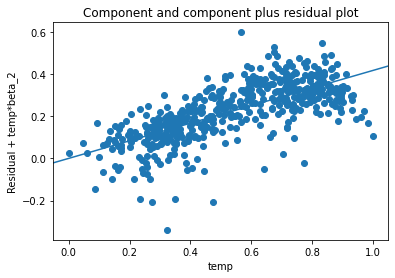

In [209]:
sm.graphics.plot_ccpr(lr6, 'temp')
plt.show()

<i> From the above graph,we can conclude that linearity is very well preserved.</i>

### Homoscedasticity


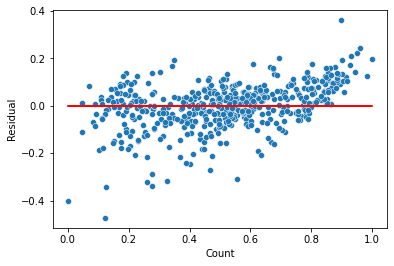

In [210]:
y_train_pred = lr6.predict(X_train_lm6)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

<i>From the above graph we can see that there is no visible pattern in residual values, thus homoscedacity is well preserved.</i>

### Absence of multicolinearity

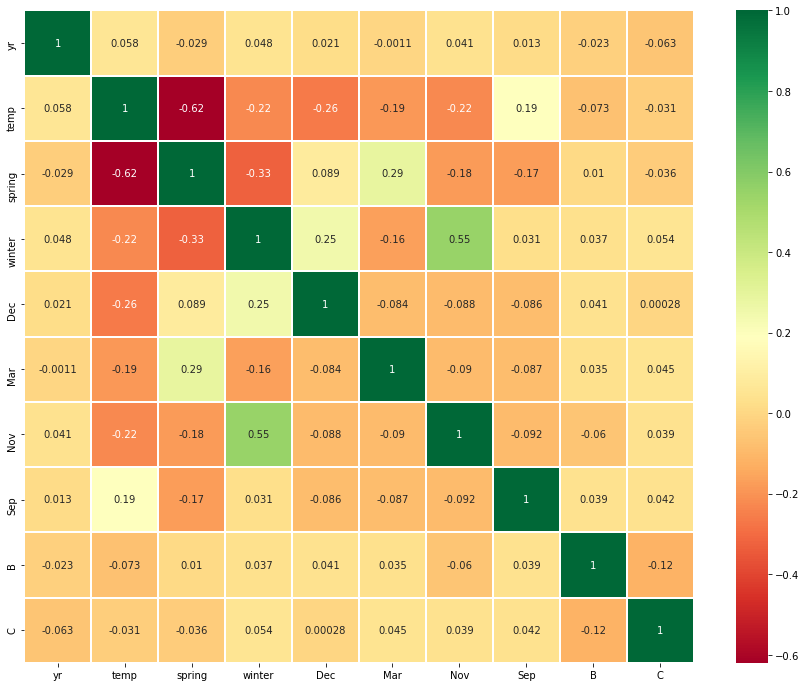

In [211]:
plt.figure(figsize=(15,12))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

In [212]:
get_VIF(X_train_new)

,Features,VIF
3,winter,2.31
1,temp,2.28
0,yr,2.03
6,Nov,1.75
8,B,1.50
2,spring,1.42
4,Dec,1.34
5,Mar,1.21
7,Sep,1.17
9,C,1.05


<i> From the above results, we can conclude that there is no multicolinearity among variables.</i>

### Error terms are independent of each other

Durbin-Watson test:- This test is used to assess whether error terms are independent of each other or not. The value ranges from 0 to 4. If the value is between 0 – 2: positive auto-correlation,2 – 4: negative auto-correlation and if value is closer or equal to 2 , then no auto-correlation.

In [213]:
print('The Durbin-Watson value for Final Model is',round(sm.stats.stattools.durbin_watson((y_train - y_train_pred)),4))

The Durbin-Watson value for Final Model is 2.0086


<i> The value is almost equal to 2.This means that error terms are independent of each other.</i>

### Error terms are normally distributed with mean zero.

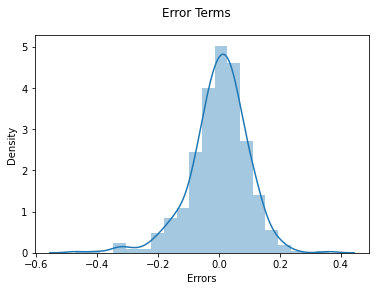

In [214]:
res = y_train-y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')                         
plt.show()

<i> The above graph proves the assumption given above.</i>

## 9)Making predictions using final model

In [215]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Nov,Oct,Sep,B,C,Mon,Sat,Sun,Thurs,Wed
22,0,0,1,0.046591,0.025950,0.453529,0.462217,0.110907,1,0,...,0,0,0,0,0,0,0,0,1,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,0,1,...,0,0,0,0,0,0,0,0,0,0
553,1,0,1,0.951196,0.933712,0.596104,0.212829,0.534975,0,0,...,0,0,0,0,0,0,0,0,0,1
504,1,0,1,0.699909,0.662746,0.551083,0.478229,0.817648,0,1,...,0,0,0,0,0,0,0,0,0,1
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,...,0,0,0,1,0,0,1,0,0,0


In [216]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Nov,Oct,Sep,B,C,Mon,Sat,Sun,Thurs,Wed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.495455,0.040909,0.690909,0.550981,0.527344,0.662328,0.346015,0.519816,0.236364,0.268182,...,0.072727,0.086364,0.081818,0.322727,0.036364,0.140909,0.150000,0.131818,0.122727,0.150000
std,0.501120,0.198531,0.463173,0.228967,0.214959,0.143278,0.159517,0.219880,0.425817,0.444023,...,0.260281,0.281541,0.274713,0.468586,0.187620,0.348721,0.357886,0.339064,0.328872,0.357886
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.357562,0.352129,0.553355,0.232051,0.364818,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.557133,0.546299,0.661688,0.327568,0.525943,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.750530,0.707506,0.761905,0.435172,0.683128,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [217]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [218]:
col1=X_train_new.columns

X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)

X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 22 to 483
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   const   220 non-null    float64
 1   yr      220 non-null    int64  
 2   temp    220 non-null    float64
 3   spring  220 non-null    uint8  
 4   winter  220 non-null    uint8  
 5   Dec     220 non-null    uint8  
 6   Mar     220 non-null    uint8  
 7   Nov     220 non-null    uint8  
 8   Sep     220 non-null    uint8  
 9   B       220 non-null    uint8  
 10  C       220 non-null    uint8  
dtypes: float64(2), int64(1), uint8(8)
memory usage: 8.6 KB


In [219]:

y_pred = lr6.predict(X_test_lm6)

Text(0, 0.5, 'y_pred')

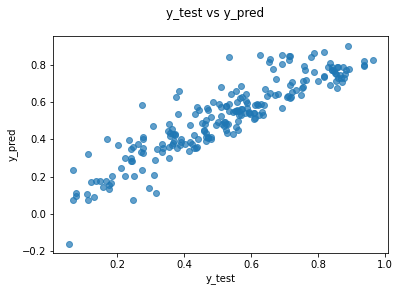

In [220]:
fig = plt.figure()
plt.scatter(y_test, y_pred,alpha = 0.7)
fig.suptitle('y_test vs y_pred')             
plt.xlabel('y_test')                          
plt.ylabel('y_pred')

In [221]:
#calculating the r-square value
r_sqr = round(r2_score(y_test, y_pred),4)
r_sqr

0.8176

In [222]:
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r_sqr = round(1-(1-r_sqr)*(n-1)/(n-p-1),4)
adjusted_r_sqr

0.8089

r-square value for test data=0.8176
r-square value for train data=0.817

adjusted r square value for test data=0.808
adjusted r square value for train data=0.813

The above values of r-square and adjusted-r square shows that our model is pretty good.

In [225]:
#calculating RMSE for the model
import math
RMSE = round(math.sqrt(mean_squared_error(y_test, y_pred)),4)
RMSE

0.0937

In [226]:
#calculating mean absolute error
MAE = round(mean_absolute_error(y_test, y_pred),4)
MAE

0.0738

conclusion:
From the above model we can conclude that the most important factors that should be considered by the company are
1) Temperature
2) year
3) season(especially winter)
4) specific month like september,november,march and december